# AD CAMPAIGN PERFORMANCE

## Business Objective

The main objective of this project is to test if the ads that the advertising company runs resulted in a significant lift in brand awareness. 


## Project workflow


*   Setting up A/B testing framework
*   Validating the data validity
*   Performing A/B testing with classical, sequential and Machine learning methods
*   Extracting statistically valid insights in relation to the  business objective



In [ ]:
#Importing libraries that we will be using
%matplotlib inline
!pip install -U pandas-profiling

import statsmodels.api as sm
import numpy as np # linear algebra
import scipy
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from tabulate import tabulate
import pandas_profiling
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action="ignore")

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.ensemble import RandomForestRegressor

In [3]:
!pip freeze > requirements.txt

In [4]:
#Reading our data
bio_data=pd.read_csv('/content/drive/My Drive/ABAdRecall.csv')

In [5]:
bio_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


## BIO Data Exploration

In [6]:
bio_data.info() # getting the information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [7]:
#check the decoration
bio_data.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [8]:
bio_data['auction_id'].nunique()

8077

In [9]:
profile = pandas_profiling.ProfileReport(bio_data)
profile.to_file('profile_report.html')

In [ ]:
profile

In [11]:
date_data = bio_data.groupby(['date']).agg({'date': ['count']})
date_data.columns = ['count']
date_data = date_data.reset_index()
print(tabulate(date_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════╤═════════╕
│    │ date       │   count │
╞════╪════════════╪═════════╡
│  0 │ 2020-07-03 │    2015 │
├────┼────────────┼─────────┤
│  1 │ 2020-07-04 │     903 │
├────┼────────────┼─────────┤
│  2 │ 2020-07-05 │     890 │
├────┼────────────┼─────────┤
│  3 │ 2020-07-06 │     490 │
├────┼────────────┼─────────┤
│  4 │ 2020-07-07 │     480 │
╘════╧════════════╧═════════╛


In [12]:
fig = px.histogram(bio_data, x="date")
fig.show()

In [13]:
hour_data = bio_data.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['count']
hour_data = hour_data.reset_index()
print(tabulate(hour_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════╤═════════╕
│    │   hour │   count │
╞════╪════════╪═════════╡
│  0 │      0 │     194 │
├────┼────────┼─────────┤
│  1 │      1 │     222 │
├────┼────────┼─────────┤
│  2 │      2 │     230 │
├────┼────────┼─────────┤
│  3 │      3 │     266 │
├────┼────────┼─────────┤
│  4 │      4 │     281 │
╘════╧════════╧═════════╛


In [14]:
#a function for getting the top ten users per application    
def unique_count(dataframe, variable):
    unique_values=dataframe.groupby([variable]).agg({variable: ['count']})
    unique_values.columns= ['count']
    unique_values= unique_values.reset_index
    print('Count of unique values : '+ variable)
    print('------------------------------------------------')
    print(tabulate(unique_values, headers = 'keys', tablefmt = 'fancy_grid'))

In [15]:
#unique_count(bio_data,'browser')

In [16]:
fig = px.histogram(bio_data, x="hour")
fig.show()

In [17]:
device_data = bio_data.groupby(['device_make']).agg({'device_make': ['count']})
device_data.columns = ['count']
device_data = device_data.reset_index()
print(tabulate(device_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═══════════════╤═════════╕
│    │ device_make   │   count │
╞════╪═══════════════╪═════════╡
│  0 │ 5008Y_EEA     │       1 │
├────┼───────────────┼─────────┤
│  1 │ 5099Y         │       1 │
├────┼───────────────┼─────────┤
│  2 │ 6039Y         │       1 │
├────┼───────────────┼─────────┤
│  3 │ A0001         │       2 │
├────┼───────────────┼─────────┤
│  4 │ ALE-L21       │       1 │
╘════╧═══════════════╧═════════╛


In [18]:
fig = px.histogram(bio_data, x="device_make")
fig.show()

In [19]:
experiment_groups = bio_data.groupby(['experiment']).agg({'experiment': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.reset_index()
print(tabulate(experiment_groups, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════════════╤═════════╕
│    │ experiment   │   count │
╞════╪══════════════╪═════════╡
│  0 │ control      │    4071 │
├────┼──────────────┼─────────┤
│  1 │ exposed      │    4006 │
╘════╧══════════════╧═════════╛


In [20]:
fig = px.histogram(bio_data, x="experiment")
fig.show()

In [21]:
browser_types = bio_data['browser'].value_counts()
browser_types.columns = ['count']
browser_types = browser_types.reset_index()
print(tabulate(browser_types, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════════════════════╤═══════════╕
│    │ index                      │   browser │
╞════╪════════════════════════════╪═══════════╡
│  0 │ Chrome Mobile              │      4554 │
├────┼────────────────────────────┼───────────┤
│  1 │ Chrome Mobile WebView      │      1489 │
├────┼────────────────────────────┼───────────┤
│  2 │ Samsung Internet           │       824 │
├────┼────────────────────────────┼───────────┤
│  3 │ Facebook                   │       764 │
├────┼────────────────────────────┼───────────┤
│  4 │ Mobile Safari              │       337 │
├────┼────────────────────────────┼───────────┤
│  5 │ Chrome Mobile iOS          │        51 │
├────┼────────────────────────────┼───────────┤
│  6 │ Mobile Safari UI/WKWebView │        44 │
├────┼────────────────────────────┼───────────┤
│  7 │ Chrome                     │         3 │
├────┼────────────────────────────┼───────────┤
│  8 │ Pinterest                  │         3 │
├────┼────────────────────────────┼─────

In [22]:
fig = px.histogram(bio_data, x="browser")
fig.show()

In [23]:
bio_data.isnull().sum() #checking for any null values in our data

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [24]:
exposed_data=bio_data[bio_data['experiment'] == 'exposed']
exposed_data.to_csv('Exposed_group_data.csv',index=False)

In [25]:
exposed_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8065,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,0,0
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0


In [26]:
exposed_yes_data = exposed_data.groupby(['yes']).agg({'yes': ['count']})
exposed_yes_data.columns = ['count']
exposed_yes_data = exposed_yes_data.reset_index()
print(tabulate(exposed_yes_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═══════╤═════════╕
│    │   yes │   count │
╞════╪═══════╪═════════╡
│  0 │     0 │    3698 │
├────┼───────┼─────────┤
│  1 │     1 │     308 │
╘════╧═══════╧═════════╛


In [27]:
exposed_no_data = exposed_data.groupby(['no']).agg({'no': ['count']})
exposed_no_data.columns = ['count']
exposed_no_data = exposed_no_data.reset_index()
print(tabulate(exposed_no_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════╤═════════╕
│    │   no │   count │
╞════╪══════╪═════════╡
│  0 │    0 │    3657 │
├────┼──────┼─────────┤
│  1 │    1 │     349 │
╘════╧══════╧═════════╛


In [28]:
exposed_date_data = exposed_data.groupby(['date']).agg({'date': ['count']})
exposed_date_data.columns = ['count']
exposed_date_data = exposed_date_data.reset_index()
print(tabulate(exposed_date_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════╤═════════╕
│    │ date       │   count │
╞════╪════════════╪═════════╡
│  0 │ 2020-07-03 │     470 │
├────┼────────────┼─────────┤
│  1 │ 2020-07-04 │     477 │
├────┼────────────┼─────────┤
│  2 │ 2020-07-05 │     528 │
├────┼────────────┼─────────┤
│  3 │ 2020-07-06 │     294 │
├────┼────────────┼─────────┤
│  4 │ 2020-07-07 │     257 │
╘════╧════════════╧═════════╛


In [29]:
exposed_hour_data = exposed_data.groupby(['hour']).agg({'hour': ['count']})
exposed_hour_data.columns = ['count']
exposed_hour_data = exposed_hour_data.reset_index()
print(tabulate(exposed_hour_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════╤═════════╕
│    │   hour │   count │
╞════╪════════╪═════════╡
│  0 │      0 │     104 │
├────┼────────┼─────────┤
│  1 │      1 │     138 │
├────┼────────┼─────────┤
│  2 │      2 │     139 │
├────┼────────┼─────────┤
│  3 │      3 │     161 │
├────┼────────┼─────────┤
│  4 │      4 │     173 │
╘════╧════════╧═════════╛


In [30]:
exposed_device_data = exposed_data.groupby(['device_make']).agg({'device_make': ['count']})
exposed_device_data.columns = ['count']
exposed_device_data = exposed_device_data.reset_index()
print(tabulate(exposed_device_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═══════════════╤═════════╕
│    │ device_make   │   count │
╞════╪═══════════════╪═════════╡
│  0 │ 5099Y         │       1 │
├────┼───────────────┼─────────┤
│  1 │ 6039Y         │       1 │
├────┼───────────────┼─────────┤
│  2 │ A0001         │       1 │
├────┼───────────────┼─────────┤
│  3 │ ALE-L21       │       1 │
├────┼───────────────┼─────────┤
│  4 │ ANE-LX1       │       9 │
╘════╧═══════════════╧═════════╛


In [31]:
exposed_browser_types = exposed_data['browser'].value_counts()
exposed_browser_types.columns = ['count']
exposed_browser_types = exposed_browser_types.reset_index()
print(tabulate(exposed_browser_types, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════════════════════╤═══════════╕
│    │ index                      │   browser │
╞════╪════════════════════════════╪═══════════╡
│  0 │ Chrome Mobile              │      2144 │
├────┼────────────────────────────┼───────────┤
│  1 │ Chrome Mobile WebView      │      1197 │
├────┼────────────────────────────┼───────────┤
│  2 │ Samsung Internet           │       332 │
├────┼────────────────────────────┼───────────┤
│  3 │ Facebook                   │       203 │
├────┼────────────────────────────┼───────────┤
│  4 │ Mobile Safari              │        91 │
├────┼────────────────────────────┼───────────┤
│  5 │ Chrome Mobile iOS          │        17 │
├────┼────────────────────────────┼───────────┤
│  6 │ Mobile Safari UI/WKWebView │        14 │
├────┼────────────────────────────┼───────────┤
│  7 │ Opera Mobile               │         3 │
├────┼────────────────────────────┼───────────┤
│  8 │ Chrome                     │         2 │
├────┼────────────────────────────┼─────

In [32]:
control_data=bio_data[bio_data['experiment'] == 'control']
#control_data=control_data.to_csv('control_group_data.csv',index=False)

In [33]:
control_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [34]:
control_yes_data = control_data.groupby(['yes']).agg({'yes': ['count']})
control_yes_data.columns = ['count']
control_yes_data = control_yes_data.reset_index()
print(tabulate(control_yes_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═══════╤═════════╕
│    │   yes │   count │
╞════╪═══════╪═════════╡
│  0 │     0 │    3807 │
├────┼───────┼─────────┤
│  1 │     1 │     264 │
╘════╧═══════╧═════════╛


In [35]:
control_no_data = control_data.groupby(['no']).agg({'no': ['count']})
control_no_data.columns = ['count']
control_no_data = control_no_data.reset_index()
print(tabulate(control_no_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════╤═════════╕
│    │   no │   count │
╞════╪══════╪═════════╡
│  0 │    0 │    3749 │
├────┼──────┼─────────┤
│  1 │    1 │     322 │
╘════╧══════╧═════════╛


In [36]:
control_date_data = control_data.groupby(['date']).agg({'date': ['count']})
control_date_data.columns = ['count']
control_date_data = control_date_data.reset_index()
print(tabulate(control_date_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════╤═════════╕
│    │ date       │   count │
╞════╪════════════╪═════════╡
│  0 │ 2020-07-03 │    1545 │
├────┼────────────┼─────────┤
│  1 │ 2020-07-04 │     426 │
├────┼────────────┼─────────┤
│  2 │ 2020-07-05 │     362 │
├────┼────────────┼─────────┤
│  3 │ 2020-07-06 │     196 │
├────┼────────────┼─────────┤
│  4 │ 2020-07-07 │     223 │
╘════╧════════════╧═════════╛


In [37]:
control_hour_data = control_data.groupby(['hour']).agg({'hour': ['count']})
control_hour_data.columns = ['count']
control_hour_data = control_hour_data.reset_index()
print(tabulate(control_hour_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════╤═════════╕
│    │   hour │   count │
╞════╪════════╪═════════╡
│  0 │      0 │      90 │
├────┼────────┼─────────┤
│  1 │      1 │      84 │
├────┼────────┼─────────┤
│  2 │      2 │      91 │
├────┼────────┼─────────┤
│  3 │      3 │     105 │
├────┼────────┼─────────┤
│  4 │      4 │     108 │
╘════╧════════╧═════════╛


In [38]:
control_device_data = control_data.groupby(['device_make']).agg({'device_make': ['count']})
control_device_data.columns = ['count']
control_device_data = control_device_data.reset_index()
print(tabulate(control_device_data.head(), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═══════════════╤═════════╕
│    │ device_make   │   count │
╞════╪═══════════════╪═════════╡
│  0 │ 5008Y_EEA     │       1 │
├────┼───────────────┼─────────┤
│  1 │ A0001         │       1 │
├────┼───────────────┼─────────┤
│  2 │ ANE-LX1       │       9 │
├────┼───────────────┼─────────┤
│  3 │ ATU-L11       │       1 │
├────┼───────────────┼─────────┤
│  4 │ BBF100-1      │       1 │
╘════╧═══════════════╧═════════╛


In [39]:
control_browser_types = control_data['browser'].value_counts()
control_browser_types.columns = ['count']
control_browser_types = control_browser_types.reset_index()
print(tabulate(control_browser_types, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤════════════════════════════╤═══════════╕
│    │ index                      │   browser │
╞════╪════════════════════════════╪═══════════╡
│  0 │ Chrome Mobile              │      2410 │
├────┼────────────────────────────┼───────────┤
│  1 │ Facebook                   │       561 │
├────┼────────────────────────────┼───────────┤
│  2 │ Samsung Internet           │       492 │
├────┼────────────────────────────┼───────────┤
│  3 │ Chrome Mobile WebView      │       292 │
├────┼────────────────────────────┼───────────┤
│  4 │ Mobile Safari              │       246 │
├────┼────────────────────────────┼───────────┤
│  5 │ Chrome Mobile iOS          │        34 │
├────┼────────────────────────────┼───────────┤
│  6 │ Mobile Safari UI/WKWebView │        30 │
├────┼────────────────────────────┼───────────┤
│  7 │ Pinterest                  │         2 │
├────┼────────────────────────────┼───────────┤
│  8 │ Android                    │         1 │
├────┼────────────────────────────┼─────

## Correlation Analysis

In [40]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

In [41]:
columns = [ 'platform_os', 'hour', ] 
df1=pd.get_dummies(bio_data)
corr =bio_data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

In [42]:
corr

,x,y,value
0,platform_os,platform_os,1.000000
1,hour,platform_os,0.000062
2,platform_os,hour,0.000062
3,hour,hour,1.000000


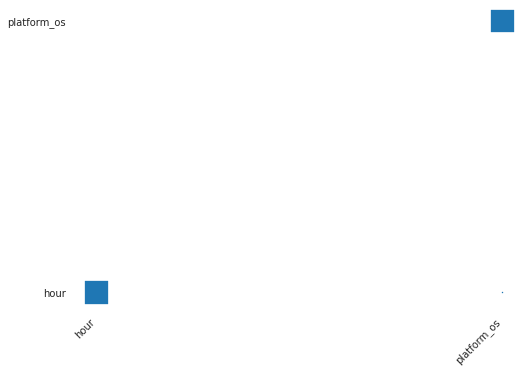

In [43]:
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

# **Classical A/B Testing**

## **Metric of choice**

We want to evaluate the performances of groups A & B, group A being users who were shown a dummy Ad and group B being users who were shown creative Ad with SmartAd brand. Seeing these changes, we want to observe the Engagement (EngR) performance. Therefore, EngR is our Metric of Choice for our AB Test.

Let the EngR proportion $\hat{p}_i$ be defined as $\hat{p}_i = \tfrac{\text{Total Number of Successes}}{\text{Total Number of Events}} = \tfrac{x_i}{n_i} $

where

$x_i$ are the successes(yes) & $n_i$ is the total count of each sample.



## **Stating the Hypothesis**

We would like to observe if there is a difference in performance between the two groups. Particularly, we want to observe if there is a statistically significant difference in their Engagement performance.

Let $\hat{p_1}$ = $\text{EngR}_{\text{Exposed group}}$ and $\hat{p_2}$ = $\text{EngR}_{\text{Control group}}$ be the EngR proportions for  Exposed and Control group respectively.

where $\hat{p}:= \tfrac{\text{# of successes(yes)}}{\text{Total # of events}}$

We state:

$H_0: \hat{p_1} = \hat{p_2}$ , or $d = 0$

$H_A: d \neq 0$

, where $d = \hat{p_1} - \hat{p_2} $

We would establish a Level of Significance, $\alpha$.

Set $\alpha = 0.05$.

## **Basic Assumptions**

From the collected samples for this type of targeted data, we assume the following conditions:

* Each answer is independent from one another

* We have a Simple Random Sample

* A user either clicks(yes/no) or does not click (leaves an impression)


* We have a consideration of invariant and variant metrics for our experiment

## **Data Transformation**

In [44]:
Exposed_group='Online users exposed to the Ad with the Brand'
Control_group='Online users shown dummy Ad'

In [45]:
#Exposed group Dataset
exposed_data.head() 

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


In [46]:
exp_data=(exposed_data.groupby('date')
      .agg(pageviews=('yes','count'),yes=('yes','sum'),no=('no','sum'),hours=('hour','sum'))
      .reset_index()
       )

In [47]:
# Control group Dataset
control_data.sort_values(by='date',ascending=True, inplace = True)
control_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
5071,a1590247-2f0b-4941-a7ae-0813e6342890,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
2282,4ae2447f-24c6-492e-b829-177d609d766c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
2281,4ade38ef-66fa-4f09-8ca6-e2d9469357c8,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5073,a1643983-4b54-4972-b55a-b69a9ddfa882,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [48]:
cont_data=(control_data.groupby('date')
      .agg(pageviews=('yes','count'),yes=('yes','sum'),no=('no','sum'),hours=('hour','sum'))
      .reset_index()
       )

In [49]:
#Subsetting the Exposed Data 
exposed=exp_data[['date','yes','no']]

In [50]:
#Subsetting the Control Data
control=cont_data[['date','yes','no']]

In [51]:

 # Confirm Dataset Schema
print(f'DataFrame Schema:\n{exposed.columns.tolist()}') #Exposed group
print(f'DataFrame Schema:\n{control.columns.tolist()}')  #control group

DataFrame Schema:
['date', 'yes', 'no']
DataFrame Schema:
['date', 'yes', 'no']


In [52]:
# Calculate the EngR for the Exposed group
exposed['EngR'] = exposed['yes'] / (exposed['no'] + exposed['yes'])

# Calculate the EngR for the Control group
control['EngR'] = control['yes'] / (control['no'] + control['yes'])

In [53]:
exposed

,date,yes,no,EngR
0,2020-07-03,43,49,0.467391
1,2020-07-04,46,45,0.505495
2,2020-07-05,35,39,0.472973
3,2020-07-06,23,25,0.479167
4,2020-07-07,22,24,0.478261
5,2020-07-08,58,61,0.487395
6,2020-07-09,55,64,0.462185
7,2020-07-10,26,42,0.382353


In [54]:

# Custom distribution plot function.
# Function uses Seaborn's Distplot.

def distribution_plot(series, series2=None, name_of_campaign = ''):

    sns.distplot( series['EngR'], hist=True, kde=True, \
        kde_kws = {'shade': True, 'linewidth': 3})

    plt.title(f'The {name_of_campaign}\'s Success Distribution')

    plt.xlabel(series['EngR'].name)
    plt.show()

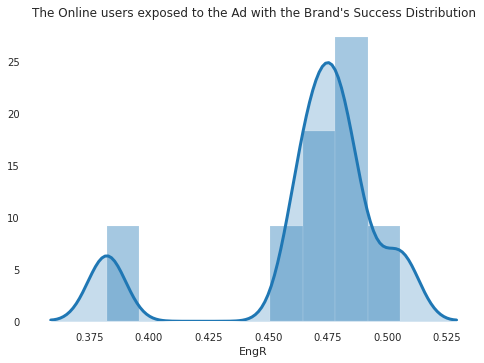

In [55]:
# Establish the exposed group's distribution
distribution_plot(series = exposed, name_of_campaign= Exposed_group)

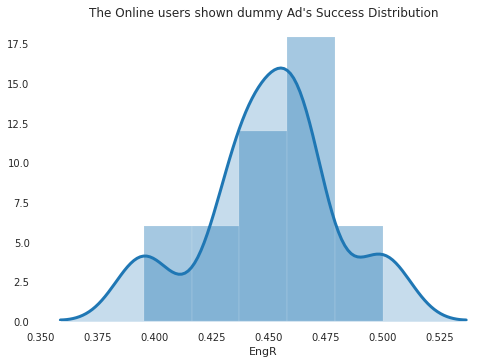

In [56]:
# Establish the control group's distribution

distribution_plot(series = control, name_of_campaign= Control_group)

In [57]:
# EngR Proportion Calculations

n1 = (exposed['no'].sum() + exposed['yes'].sum())
# p = x/n
p1 = exposed['yes'].sum() / n1

n2 = (control['no'].sum() + control['yes'].sum())
# p = x/n
p2 = control['yes'].sum() / n2

In [58]:
print(f'Exposed group 1: YR = {p1}, from Total users presented with Questionnaire are {n1}')

print(f'Control group 2: YR = {p2}, from Total users presented with Questionnaire are {n2}')

Exposed group 1: YR = 0.4687975646879756, from Total users presented with Questionnaire are 657
Control group 2: YR = 0.45051194539249145, from Total users presented with Questionnaire are 586


##  Analyzing The Results

 In this particular case, we will be using the $t$ statistic b/t two binomial distributed groups, defined as

$t= (\tfrac{ \hat{p_1} - \hat{p_2} - 0 }{SE}) = \tfrac{ d - 0 }{SE}$,

where the standard error $SE = \sqrt{(\tfrac{\hat{p_1} (1-\hat{p_1})}{n_1}) + (\tfrac{\hat{p_2} (1-\hat{p_2})}{n_2})}$

Note:

When comparing between two groups, the notation $d:=\hat{p_1} - \hat{p_2}$ is introduced to simplify formula.
This is considered a independent t-test with equal variance, and not a dependent t-test w or without equal metrics
Additionally, we set our Degrees of Freedom for these two variants, defined as $DoF := (n_1 + n_2 -2)$.

Using this DoF, we calculate the estimated $t^*$ value as a our threshold level for determining statistical significance.

For the following function, calculate the difference d, standard error, and t-statistic. Moreover, determine the resulting decision for this particular case.

In [59]:
def ind_t_test(group1, group2, alpha = 0.05, output_bool=False, state_conclusion =False, express=False):
    
    
    '''
    ind_t_test Function for manual calculation of Independent T Tests for CTR.
    
    Parameters:
    * group1: Exposed Group #1 (Dataframe)
    * group2: Control Group #2 (Dataframe)
    * alpha: Alpha is the Test of Significance
    * output_bool:
    * state_conclusion:
    * express:
    
    
    Return:
    * 1x2 Array of Click Through Rate (CTR) values. 
    * 1x2 Array of total N for each campaign. 
    * 1x2 Array of Standard Errors for each campaign. 
    * Standard Error value.
    * T-Statistic value.
    * T-Critical value.
    * Confidence Interval   
    * Calculated P-Value
    '''
    
    # Step 1: Take the proportions of provided datasets:
    ## Create the proportion calculations: p_1, p_2 for the
    ## difference d. 
    ## The first calculation step for our test.
    
    n1 = (group1['no'].sum() + group1['yes'].sum())
    p1 = group1['yes'].sum() / float(n1)

    n2 = (group2['no'].sum() + group2['yes'].sum())
    p2 = group2['yes'].sum()  / float(n2)

    d= p2 - p1
     # Step 2. Obtain the Standard Deviation:
    #    - Combined group Standard errors  
    ## Calculate the Standard Error for each proportions.
    ## This allows us to set up for the t-statistic calculation.
    p_overall = (group1['yes'].sum() + group2['yes'].sum() )/ (n1+n2)
    
    # Term 1
    ## Calculate the first term p_1 * (1-p_1) /n_1
    se1 = (p_overall * (1 - p_overall))/n1
    
    # Term 2
    ## Calculate the first term p_2 * (1-p_2) /n_2
    se2 = (p_overall * (1- p_overall))/n2
    
    ## Terms being squared for final result.
    ### SE = sqrt( SE_1 + SE_2)
    standardError = np.sqrt(float(se1) + float(se2))
    
    print('SE 1:', standardError)

    #Step 3 t-statistic
    ## T statistic calculation.
    ### d / Standard Error, where d:= p2-p1
    tStatistic = (d-0) / standardError

    # Degrees of Freedom
    ### (n_1-1) + (n_2-1) = (n_1 + n_2 -2)
    dof = (n1 + n2 - 2.0)
    
    
    # Critical T Value Test Statistic
    criticalValue = scipy.stats.t.ppf(1.0 - alpha, df = dof)
    # Confidence Interval
    ### Tip: We'd like to avoid value of 0 in this CI
    confInt = [d - (criticalValue * standardError), d + (criticalValue * standardError)]

    
    # Second type of decision criteria: |t| >= |t^*|.
    

    # Step 4: Calculating p-value
    ## Two Sided P Value, P( |t| >= |t^*|).
    ### Calcualte the p-value using a Cumulative Density function
    ### from Scipy's stats.t.cdf(t-test, DoF) function
    
    p_val = (1 - scipy.stats.t.cdf(abs(tStatistic), df \
                                   = (n1 + n2-2)) ) * 2.0
    
    if output_bool is True:
        print('Analysis:\n\n')
        print(f'Ad Campaign Exposed group"s EngR: {round(p1,4)}' \
              + f' with Standard Error {se1}.')
        print(f'Ad Campaign Control group"s EngR: {round(p2,4)}' \
              + f' with Standard Error {se2}.\n')
        
        print(f"Confidence Interval {confInt}")
        print(f'T Statistic: {round(tStatistic, 2)}\n')
        
        print(f'We have critical value t^* at {round(criticalValue, 2)}' + \
              f'\nand p-value of {round(p_val, 2)}')
        print(f'\n\nComponents for variants Ad Campaign Exposed group\'s \n& ' + \
              f'Ad Campaign Control group\'s, respectively:')
        
        print(f'Difference d: {d}')
        
        print(f'SE terms within SE calculation: {[se1,se2]}')
        print(f'SE: {standardError}')
        
        print(f'Calcualted T-statistic: {tStatistic}')
        print(f'T critical value: {criticalValue}')
    
    
    #Step 5 Statemtent of declaration & Decision        
    if state_conclusion is True:
        if express is False:
            # Restate our decision process
            print('Conclusion:\n\n')

            print(f'If the p-value is less than our defined alpha = {alpha}, then we' +\
                  ' reject the null hypothesis H_0.\nIf not, then we fail to reject the' +\
                  ' null hypothesis H_0.')

            print(f'Confidence Interval: {confInt}')
            print(f'P-value: {p_val}')
            print(f'Alpha: {alpha}')
        
        if p_val < alpha:
            print('\nWe reject the Null Hypothesis H_0')
            print('Therefore, we can say that there is a statistical ' + \
            'difference between the two campaigns.')
        else:
            print('\nWe fail to reject the Null Hypothesis H_0')
            print('\nTherefore, we can say that there is no statistical' + \
            ' significant difference between the two campaigns.')
    return([p1,p2], [n1,n2], \
           [se1,se2], standardError, \
           tStatistic, criticalValue, \
           confInt, p_val)


In [60]:

p_val = ind_t_test(group1 = exposed, group2= control, alpha = 0.05, output_bool = True,state_conclusion=True)

SE 1: 0.028319932727228023
Analysis:


Ad Campaign Exposed group"s EngR: 0.4688 with Standard Error 0.00037810369553450236.
Ad Campaign Control group"s EngR: 0.4505 with Standard Error 0.0004239148941402185.

Confidence Interval [-0.06490256228293323, 0.028331323691964887]
T Statistic: -0.65

We have critical value t^* at 1.65
and p-value of 0.52


Components for variants Ad Campaign Exposed group's 
& Ad Campaign Control group's, respectively:
Difference d: -0.018285619295484168
SE terms within SE calculation: [0.00037810369553450236, 0.0004239148941402185]
SE: 0.028319932727228023
Calcualted T-statistic: -0.645680181221037
T critical value: 1.646082405507605
Conclusion:


If the p-value is less than our defined alpha = 0.05, then we reject the null hypothesis H_0.
If not, then we fail to reject the null hypothesis H_0.
Confidence Interval: [-0.06490256228293323, 0.028331323691964887]
P-value: 0.5186058623605803
Alpha: 0.05

We fail to reject the Null Hypothesis H_0

Therefore, we can

We will use the package StatModel, with function Proportion Z-Test.

In [61]:
# Try out the Proportion Z-Test from the StatModel library 
# statsmodels.stats.proportion.proportions_ztest()

from statsmodels.stats.proportion import proportions_ztest


trial_successes = np.array([exposed['yes'].sum()  , \
              control['yes'].sum()])
total = np.array([exposed['no'].sum() + exposed['yes'].sum(), \
              control['no'].sum() + control['yes'].sum()])

zTest_statistic, zTest_pval = proportions_ztest(trial_successes, total, value=0, alternative='two-sided')

print(f'StatModels\'s Calculated t-statistic is {round(zTest_statistic,4)}' + \
      f' and p-value is {zTest_pval}')

StatModels's Calculated t-statistic is 0.6457 and p-value is 0.5184864982198968


### stating our conclusion

In [62]:
if zTest_pval < 0.05:
    print('\nWe reject the Null Hypothesis H_0')
    print('Therefore, we can say that there is a statistical ' + \
    'difference between the two campaigns.')

else:
    print('\nWe fail to reject the Null Hypothesis H_0')
    print('\nTherefore, we can say that there is no statistical' + \
    ' significant difference between the two campaigns.')


We fail to reject the Null Hypothesis H_0

Therefore, we can say that there is no statistical significant difference between the two campaigns.


Also we can use chi-squared test.
Here is the starter code for the chi-squared test






In [ ]:
'''
chiSquareStat, pVal, dof, expected = scipy.stats.chi2_contingency(twoByTwo_df)

print('Expected Table: \n',expected,'\n')

# interpret test-statistic
prob = 0.95
alpha = 1.0 - prob

criticalVal = scipy.stats.chi2.ppf(prob, dof)

print(f'Degrees of Freedom: {dof}\n')
print('probability=%.2f, critical=%.2f, stat=%.2f \n' % (prob, criticalVal, alpha))

print('Decision:')
print(f'For significance level {round(alpha,2)},\n')

if abs(chiSquareStat) >= criticalVal:
    print('We reject the Null Hypothesis, H_0\n')
    print(f'for p = {prob} >= {criticalVal}.')
else:
    print('We fail to reject the Null Hypothesis, H_0\n')
    print(f'for p = {prob} < {criticalVal}.')'''


In [64]:
total_exposed, total_control = 4006, 4071
click_e, click_c = 308, 264
rate_e, rate_c = click_e / total_exposed, click_c / total_control

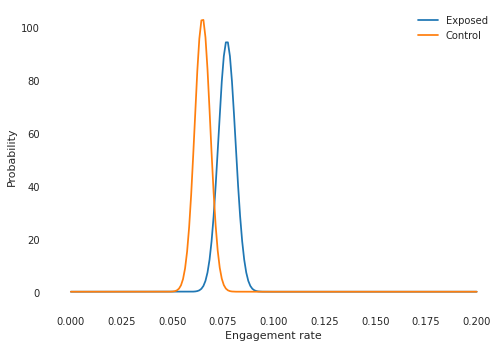

In [65]:
from scipy.stats import norm

# Where does this come from? See the link above.
std_a = np.sqrt(rate_e * (1 - rate_e) / total_exposed)
std_b = np.sqrt(rate_c * (1 - rate_c) / total_control)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_e, std_a).pdf(click_rate)
prob_b = norm(rate_c, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="Exposed")
plt.plot(click_rate, prob_b, label="Control")
plt.legend(frameon=False)
plt.xlabel("Engagement rate"); plt.ylabel("Probability");

zscore is -2.10754, with p-value 0.98246


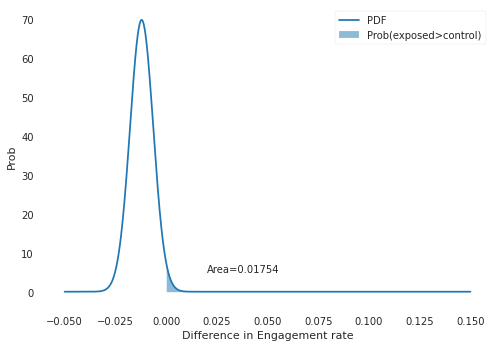

In [66]:
z_score = (rate_c - rate_e) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_c - rate_e, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(exposed>control)", alpha=0.5)
plt.annotate(f"Area={area_under_curve:0.5f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in Engagement rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.5f}, with p-value {norm().sf(z_score):0.5f}")